<a href="https://colab.research.google.com/github/kylehoffpauir/colab_example/blob/master/colab_dataviz_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title 
This is a block of text
Here we can discuss information before we write any code
The dataset we will be using for this example is the pennDOT crash dataset exvlusively for allegheny county found here: https://pennshare.maps.arcgis.com/apps/webappviewer/index.html?id=8fdbf046e36e41649bbfd9d7dd7c7e7e 


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
# how? https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92
# 
url = 'https://raw.githubusercontent.com/kylehoffpauir/colab_example/master/CRASH_ALLEGHENY_2021.csv'
df = pd.read_csv(url)


# Crash distribution by hour of day

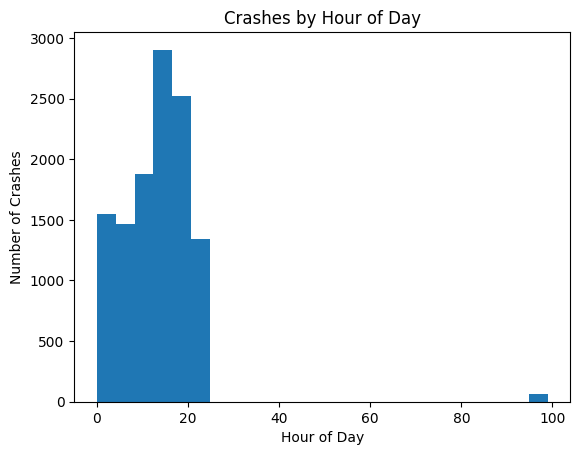

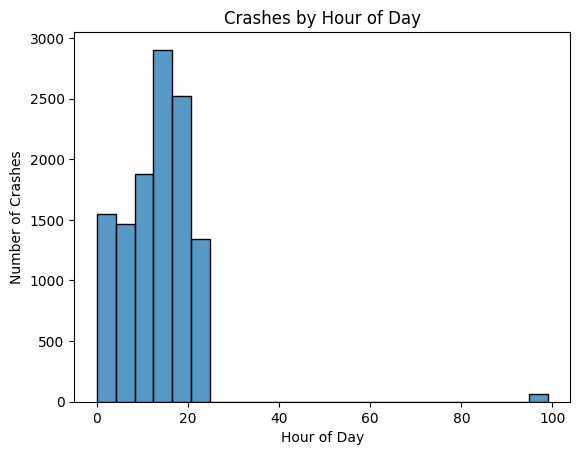

In [7]:
# Histogram of the hour of day
plt.hist(df['HOUR_OF_DAY'], bins=24)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crashes')
plt.title('Crashes by Hour of Day')
plt.show()

sns.histplot(df['HOUR_OF_DAY'], bins=24)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crashes')
plt.title('Crashes by Hour of Day')
plt.show()

# Outlier??
PennDOT dataset include hour 99 to indicate an unknown time for the crash.
In order to remedy this, we need to exclude certain values from our dataset
Lets filter the df to exclude hour 99 and we can get a better picture of just how the crashes are distributed by time

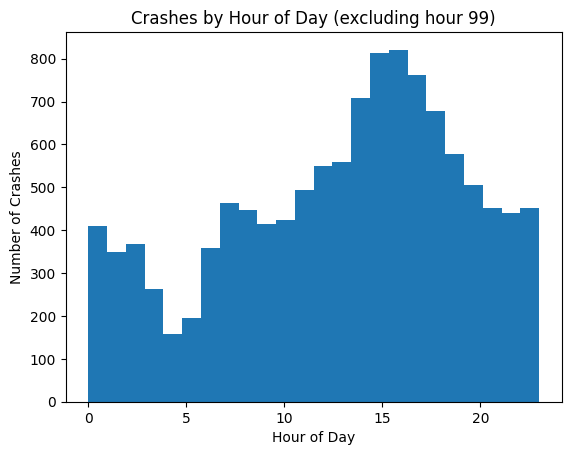

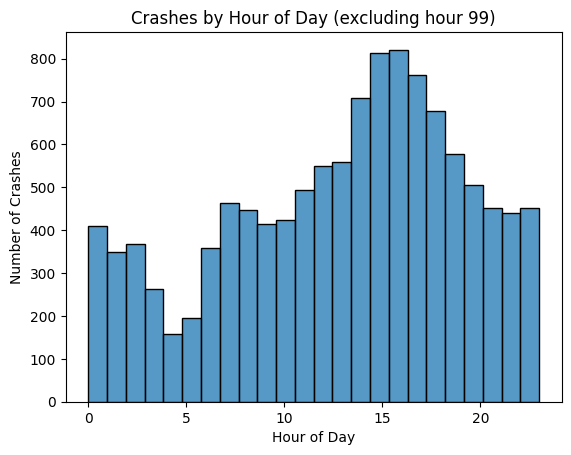

In [20]:
# Exclude hour 99 from the data
df_filtered = df[df['HOUR_OF_DAY'] != 99]

# Histogram of the hour of day
plt.hist(df_filtered['HOUR_OF_DAY'], bins=24)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crashes')
plt.title('Crashes by Hour of Day (excluding hour 99)')
plt.show()

sns.histplot(df_filtered['HOUR_OF_DAY'], bins=24)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crashes')
plt.title('Crashes by Hour of Day (excluding hour 99)')
plt.show()

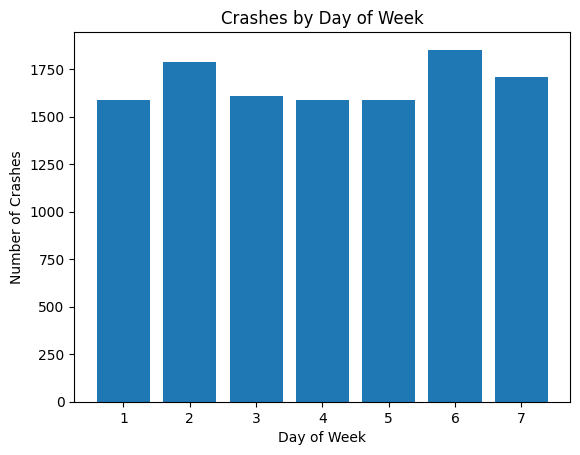

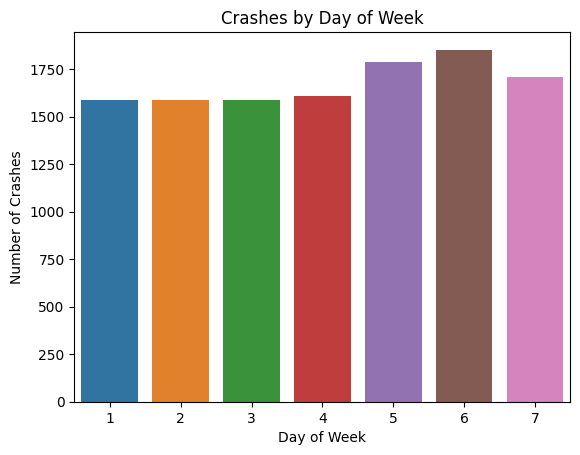

In [8]:
# Bar chart of the day of the week
plt.bar(df['DAY_OF_WEEK'].unique(), df['DAY_OF_WEEK'].value_counts())
plt.xlabel('Day of Week')
plt.ylabel('Number of Crashes')
plt.title('Crashes by Day of Week')
plt.show()

sns.countplot(x='DAY_OF_WEEK', data=df)
plt.xlabel('Day of Week')
plt.ylabel('Number of Crashes')
plt.title('Crashes by Day of Week')
plt.show()

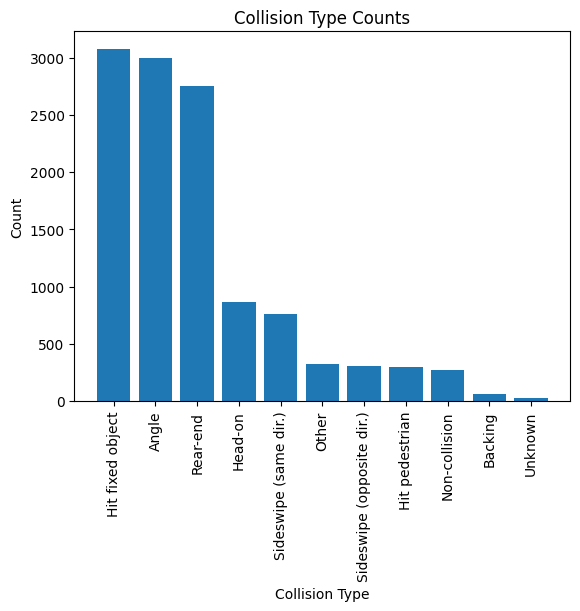

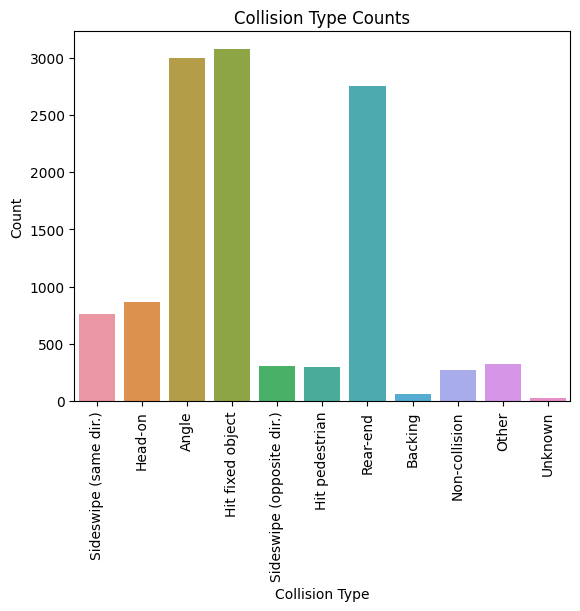

In [15]:

# Bar plot of collision type counts
collision_types = {0: "Non-collision",
                   1: "Rear-end",
                   2: "Head-on",
                   3: "Backing",
                   4: "Angle",
                   5: "Sideswipe (same dir.)",
                   6: "Sideswipe (opposite dir.)",
                   7: "Hit fixed object",
                   8: "Hit pedestrian",
                   9: "Other/Unknown (Expired)",
                   98: "Other",
                   99: "Unknown"}

df["COLLISION_TYPE"].replace(collision_types, inplace=True)

plt.bar(df["COLLISION_TYPE"].value_counts().index, df["COLLISION_TYPE"].value_counts().values)
plt.title("Collision Type Counts")
plt.xlabel("Collision Type")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

sns.countplot(data=df, x="COLLISION_TYPE")
plt.title("Collision Type Counts")
plt.xlabel("Collision Type")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

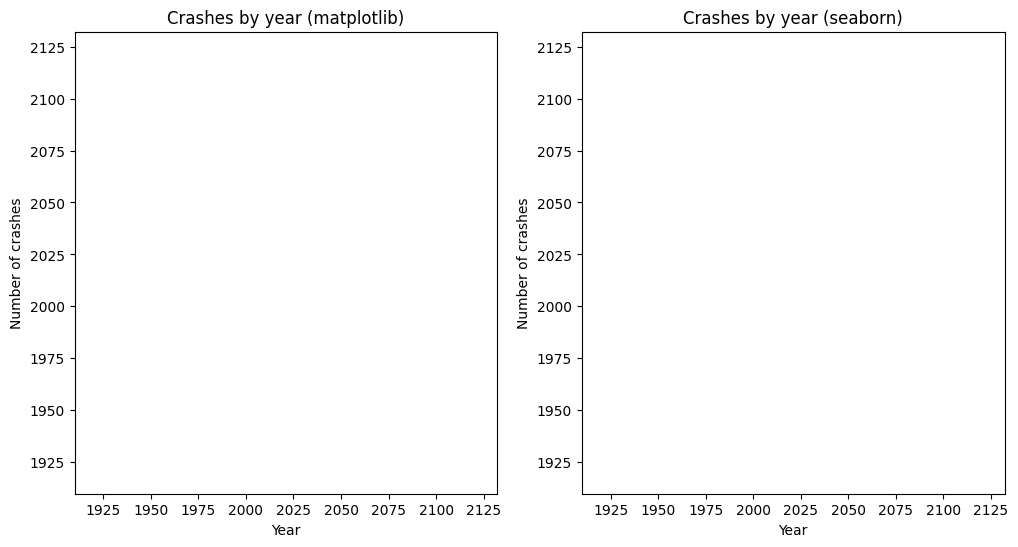

In [25]:
# Group by year and get the total number of crashes for each year
crashes_by_year = df["CRASH_YEAR"].value_counts().index
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the data using matplotlib
ax1.plot(crashes_by_year, crashes_by_year, color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of crashes')
ax1.set_title('Crashes by year (matplotlib)')

# Plot the data using seaborn
sns.lineplot(x=crashes_by_year, y=crashes_by_year, color='red', ax=ax2)
ax2.set_xlabel('Year')
ax2.set_ylabel('Number of crashes')
ax2.set_title('Crashes by year (seaborn)')

# Show the plot
plt.show()

In [14]:
import folium
from folium.plugins import MarkerCluster

# Create a map centered on Pennsylvania
crash_map = folium.Map(location=[40.88, -77.8], zoom_start=7)

# Group the markers together when zooming out
marker_cluster = MarkerCluster().add_to(crash_map)

# Create a scatter plot of the latitude and longitude coordinates with the size of the markers representing the number of crashes
for index, row in df.iterrows():
    if not pd.isna(row['DEC_LAT']) and not pd.isna(row['DEC_LONG']):
        folium.CircleMarker(location=[row['DEC_LAT'], row['DEC_LONG']], radius=row['TOTAL_UNITS'], color='red', fill=True, fill_color='red').add_to(marker_cluster)

# Show the map
crash_map

In [22]:
import plotly.express as px

# group the data by latitude and longitude and count the number of crashes at each location
crash_counts = df.groupby(['DEC_LAT', 'DEC_LONG']).size().reset_index(name='Crash Count')

# create a scatter mapbox plot using plotly express
fig = px.scatter_mapbox(crash_counts, 
                        lat="DEC_LAT", 
                        lon="DEC_LONG", 
                        color="Crash Count",
                        size="Crash Count",
                        color_continuous_scale=px.colors.cyclical.IceFire,
                        size_max=15, zoom=7)

fig.update_layout(mapbox_style="open-street-map")
fig.show()